# Aufgabenblatt 5
## 1. Magnetische Suszeptiblität

Die magnetische Suszeptiblität $\chi$ gibt die Änderung der Magnetisierung $M$ eines Systems als Funktion eines externen Magnetfeldes $B$ an. Dabei bewirkt $B$, dass die Elementarmagneten $\sigma_i$ (Spins) bevorzugt in die Richtung des externen Feldes polarisiert werden. Die Suszeptiblität $\chi$ ist dabei gegeben als 
$$\chi = \frac {\partial\langle M \rangle} {\partial B}$$
Auf der anderen Seite kann $\chi$ aus den Fluktationen der Magnetisierung eines Systems im thermodynamsichen Gleichgewichts gerechnet werden durch 
$$ \chi = \frac 1 {k_BT} \left[\langle M^2 \rangle - \langle M \rangle^2\right] = \frac 1 {k_BT} \sigma^2_M$$

Leiten Sie unter Zuhilfenahme der Beziehung für den Mittelwert einer Größe A,
$$\langle A \rangle = \frac 1 Z \int dr^N A(\{r^N\})e^{-H(\{r^N\})/k_BT} \textrm{ mit } Z = \int dr^N e^{-H(\{r^N\})/k_BT}$$ 

Gl. 2 aus Gl. 1 ab. Dabei ist die Hamiltonfunktion $H$ für das 2-d Ising-Modell gegeben durch 
$$ H = -J \sum_{ij}\sigma_i\sigma_j -B\sum_i\sigma_i$$
mit J als Kopplungskonstanten zwischen Spins, $B$ dem externen Magnetfeld und der internen Magnetisierung
$$M = \sum_i\sigma_i$$

------

#TODO

## 2. Simulation des 2-d Ising Modells

Schreiben Sie ein Programm, um das 2-d Ising Modell zu simulieren (Vergl. Vorlesung). Dabei sollen zunächst $N_{EQ}$ Monte Carlo Schritte zur Equilibrierung des Systems gerechnet werden , um das System aus seinem Anfangszustand zu bringen und ein System nahe dem thermodynamsichen Gleichgewicht zu haben (1 Monte Carlo Schritt bedeutet, dass man $N=L^2$ Einzel Monte Carlo Versuche macht, wobei $N$ die Anzahl der Spins ist und $L$ die Anzahl der Gitterpunkte in jeder Richtung). Wenn das System nicht in der Nähe der kritischen Temperatur $T_C$ simuliert wird, kann $N_{EQ} \propto L^2$ gewählt werden (z.B. $10\times L^2$).

Rechnen Sie Systeme mit $J=1$ und Größen $L = 10,20,40$ im Bereich $\beta=  {1}/{k_BT} \in  \{0.3, 0.6\}$ mit Abständen $\delta\beta=0.02$ und rechnen Sie die Energie
$$U = - \sum_{i,j}\sigma_i\sigma_j$$
und Magnetisierung
$$M = \sum_i \sigma_i$$

der Systeme nach jedem Monte Carlo Schritt aus und schreiben Sie eine Datei. Die Daten sollen für jedes System mit verschiednem $L$ und $\beta$ analysiert werden.

Rechnen Sie

* die Mittelwerte der Energie und der Magnetisierung
* die Varianz der Energie und der Magnetisierung
* die spezifische Wärme $C_V$ und die magnetische Suszeptiblït $\chi$
$$C_V = \frac 1 {k_BT^2} \left[\langle U^2\rangle - \langle U \rangle^2\right]$$
$$\chi = \frac 1 {k_BT}  \left[\langle M^2\rangle - \langle M \rangle^2\right]$$
  und tragen Sie die Datengraphisch als Funktion von $\beta$ für jedes $L$ auf.

In [1]:
%pylab inline
import random

Populating the interactive namespace from numpy and matplotlib


In [2]:
class MetropolisIsing:
    def __init__(self, L, J, beta):
        self.L = L
        self.J = J
        self.N = L*L
        self.beta = beta
        self.spins = np.ones([self.N,1], dtype=np.int32)
        self.spins2D = self.spins.reshape([L,L])
        #self.spins = np.random.choice([-1,1], size=self.N).reshape([self.N,1])
    def show(self):
        pylab.matshow(self.spins.reshape([self.L, self.L]))
        pylab.show()
    def magnetisierung(self):
        return self.spins.sum()
    def energy(self):
        return -self.J * (self.spins * self.spins.T).sum()
    #Bestimme die Lokale Energie? War das so gedacht?
    def getLocalEnergy(self, x, y):
        e = 0
        if x > 0:
            e += self.spins2D[x - 1, y]
        if y > 0:
            e += self.spins2D[x,y - 1]
        if x < L - 1:
            e += self.spins2D[x + 1, y]
        if y < L - 1:
            e += self.spins2D[x, y + 1]
        return e * self.spins2D[x,y]
    def monteCarloStep(self):
        #Laufe N(=L^2)-mal durch für einen Monte Carlo Schritt
        for i in range(self.N):
            #1. Wähle einen Spin im System aus
            spinX = random.randint(0, self.L - 1)
            spinY = random.randint(0, self.L - 1)
            #Berechne die Energie im Anfangszustand
            H_0 = -self.J * self.getLocalEnergy(spinX, spinY)
            #3. Flippe den Spin um 180 Grad
            self.spins2D[spinX, spinY] *= -1
            #TODO: Bessere Berechnung für H_1
            #4. Bestimme die Energie im Endzustand
            H_1 = -self.J *  self.getLocalEnergy(spinX, spinY)
            #5. Bestimme die Energiedifferenz zwischen Anfangs- und Endzustand
            deltaH = H_0 - H_1
            #6. Entschiede mit Hilfe des Metropolis Kriteriums ob der neue Zustand akzeptiert wird.
            x = -self.beta*deltaH
            if x > 0 or random.random() < min(1, math.exp(x)):
                #Zustand akzeptiert
                pass
            else:
                #Zustand abgelehnt
                #Spin wieder zurückdrehen
                self.spins2D[spinX, spinY] *= -1

In [5]:
%%time
Ls = [10, 20]
J = 1
betas = np.linspace(0.3,0.6,15)

magnetisierung = np.empty([len(Ls), len(betas)])
magnetisierungV = np.empty([len(Ls), len(betas)])
energy = np.empty([len(Ls), len(betas)])
energyV = np.empty([len(Ls), len(betas)])
def equil(sim):
    for i in range(sim.L**2*10):
        sim.monteCarloStep()
        
N = 100
for i,L in enumerate(Ls):
    for j,beta in enumerate(betas):
        sim = MetropolisIsing(L, J, beta)
        equil(sim)
        #Durchschnitt der Energy und Magnetisierung über N Zeitschritte nach der Equilibrierung
        energyValues = np.empty(N)
        magnetValues = np.empty(N)
        for z in range(N):
            sim.monteCarloStep()
            magnetValues[z] = sim.magnetisierung()
            energyValues[z] = sim.energy()
        magnetisierung[i][j] = magnetValues.mean()
        magnetisierungV[i][j] = magnetValues.var()
        energy[i][j] = energyValues.mean()
        energyV[i][j] = energyValues.var()

        

Wall time: 5min 44s


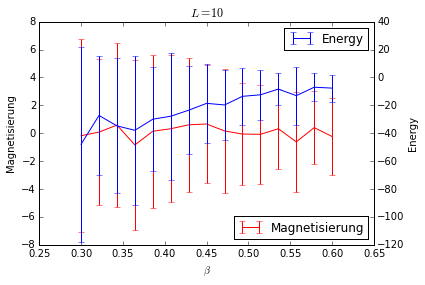

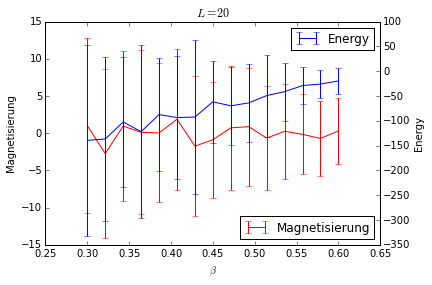

In [19]:
for i, L in enumerate(Ls):
    fig, ax1 = pylab.subplots()
    ax1.set_title("$L=%d$" % L)
    ax2 = ax1.twinx()
    ax1.set_ylabel("Magnetisierung")
    ax1.errorbar(betas,magnetisierung[i], fmt='r', yerr=np.sqrt(magnetisierungV[i]), label="Magnetisierung")
    ax2.set_ylabel("Energy")
    ax2.errorbar(betas,energy[i], fmt='b', yerr=np.sqrt(energyV[i]), label="Energy")
    ax1.legend(loc='lower right')
    ax2.legend(loc='upper right')
    ax1.set_xlabel(r"$\beta$")
    pylab.show()